# Step 5-7
Choose task formulation for regression. Estimate multivariate correlation(target-predictors).

Target variable for regression will be 'Adj Close' column.

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

data = pd.read_csv("data/NVIDIA Corporation.csv")

data.dropna()
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,1/22/1999,0.488281,0.388021,0.437500,0.410156,271468800,0.376518
1,1/25/1999,0.458333,0.410156,0.442708,0.453125,51048000,0.415963
2,1/26/1999,0.467448,0.411458,0.458333,0.417969,34320000,0.383690
3,1/27/1999,0.429688,0.395833,0.419271,0.416667,24436800,0.382495
4,1/28/1999,0.419271,0.412760,0.416667,0.415365,22752000,0.381300


Predictors, target variable

In [17]:
X = data[['High', 'Low', 'Open', 'Close']]
y = data[['Adj Close']]

# Division into training and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

x = []
for i in range(len(y_test)):
    x.append(i)
# Create a linear regression model
reg = LinearRegression(normalize=True)
# Train a linear regression model
reg.fit(X_train, y_train)
# Forecast on a test sample
y_pred = reg.predict(X_test)
params = np.append(reg.intercept_,reg.coef_)

If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Metrics

In [18]:
# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('Mean absolute error = ', mae)
print('Mean squared error = ', mse)

Mean absolute error =  0.10363594135986827
Mean squared error =  0.018913686940430812


Visualization

Text(0, 0.5, 'Adj Close')

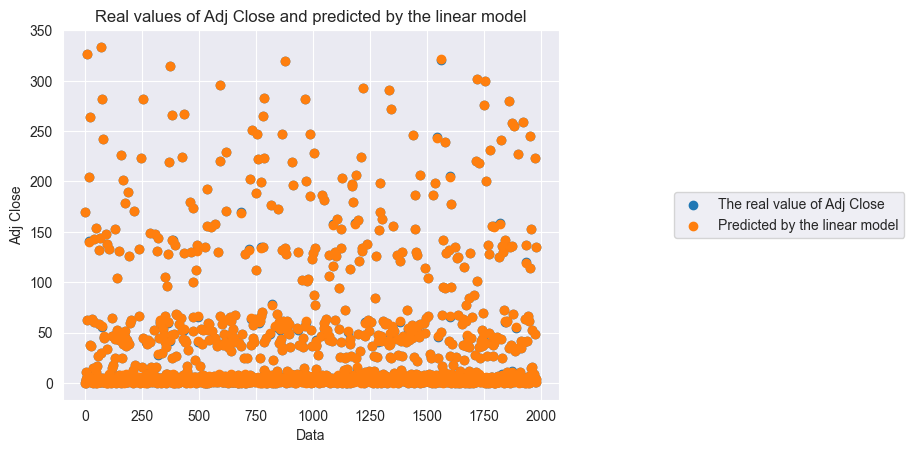

In [19]:
#graph of real and predicted values
plt.scatter(x, y_test, label = u'The real value of Adj Close')
plt.scatter(x, y_pred, label = u'Predicted by the linear model')
plt.title(u'Real values of Adj Close and predicted by the linear model')
plt.legend(loc="center right",borderaxespad=0.1, bbox_to_anchor=(1.7, 0.5))
plt.xlabel(u'Data')
plt.ylabel(u'Adj Close')

Correlation matrix of features

Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

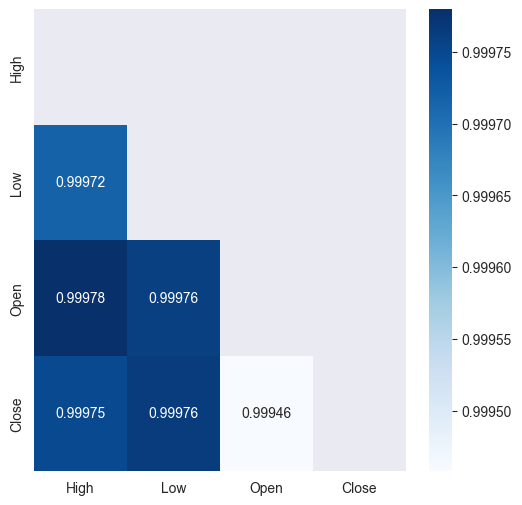

In [20]:
# Building a correlation matrix of features
dataset = data[['High', 'Low', 'Open', 'Close']]
corr = dataset.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 6))

sns.heatmap(corr, mask = mask, annot=True, fmt= '.5f', ax = ax, cmap = 'Blues')

Confidence intervals

In [21]:
#Confidence interval of regression coef
import numpy as np, statsmodels.api as sm
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print (res.conf_int(0.01))

              0         1
High   0.005726  0.034609
Low   -0.032728 -0.004058
Open  -0.013499  0.013373
Close  0.982453  1.009267


Distribution of residuals

0.0003586720566523299



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_diff, kde=False)


<AxesSubplot:>

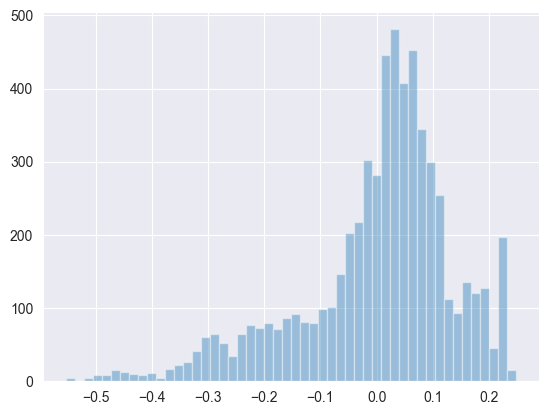

In [23]:
# If distribution looks like normal and mean value of it is 0, then model is good
y_pred_all = np.array(reg.predict(X))
y1 = np.array(y)
y2 = np.array(y_pred_all)
y_diff = y1[:,0] - y2[:,0]
sns.distplot(y_diff, kde=False)